We certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym, copy, random
from gym import spaces
from google.colab import widgets
import time
import plotly.express as px
import torch
from collections import deque
import copy

# Environment

In [ ]:
class GridEnvironment(gym.Env):
  metadata = { 'render.modes': []}

  def __init__(self):
    self.observation_space = spaces.Discrete(49)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 10
    self.timestep1 = 0
    self.timestep2 = 0
    self.agent_pos1 = [0, 0]
    self.agent_pos2 = [6, 6]
    self.gold =[6, 3]
    self.monster1 =[3, 6]
    self.monster2 =[3, 0]
    self.dimond =[0, 3]
    self.goal_pos = [3, 3]
    self.state = np.zeros((7, 7))
    self.state[tuple(self.agent_pos1)] = 1
    self.state[tuple(self.agent_pos2)] = 1
    self.state[tuple(self.goal_pos)] = 1
    self.reward1 = 0
    self.reward2 = 0
    self.done1 = False
    self.done2 = False
    self.discFact = 0.95
    self.isGold = False
    self.isDimond = False
  # This method will rwset the environment.
  def reset(self):
    self.timestep1 = 0
    self.timestep2 = 0
    self.agent_pos1 = [0, 0]
    self.agent_pos2 = [6, 6]
    self.reward1 = 0
    self.reward2 = 0
    self.__colorCode()
    self.done1 = False
    self.done2 = False
    self.isGold = False
    self.isDimond = False
    observation = self.state.flatten()
    return observation
  # This Method will execute the steps based on action provided.
  def step(self, action, isAgent1):
    self.__colorCode()
    self.__getPosition(action, isAgent1)
    self.state = np.zeros((7,7))
    self.__colorCode()
    observation = self.state
    self.__getRewards(isAgent1)
    if isAgent1:
      self.timestep1 +=1
      self.done1 = True if self.timestep1 >= self.max_timesteps or self.done1 else False
      return self.reward1, self.done1, observation
    else: 
      self.timestep2 +=1
      self.done2 = True if self.timestep2 >= self.max_timesteps or self.done2 else False
      return self.reward2, self.done2, observation
  # It is used to visualize the Environment.
  def render(self):
    plt.title('Grid World')
    plt.imshow(self.state)
  # It will determine action using deterministic environment.
  def __getPosition(self, action, isAgent1):
    if isAgent1:
      if action == 0:
        self.agent_pos1[0] += 1
      elif action == 1:
        self.agent_pos1[0] -= 1
      elif action == 2:
        self.agent_pos1[1] += 1
      elif action == 3:
        self.agent_pos1[1] -= 1
      self.agent_pos1 = np.clip(self.agent_pos1, 0, 6)
    else:
      if action == 0:
        self.agent_pos2[0] += 1
      elif action == 1:
        self.agent_pos2[0] -= 1
      elif action == 2:
        self.agent_pos2[1] += 1
      elif action == 3:
        self.agent_pos2[1] -= 1
      self.agent_pos2 = np.clip(self.agent_pos2, 0, 6)
  # This method will set the color of different reward position and agent.
  def __colorCode(self):
    self.state[tuple(self.agent_pos1)] = 1
    self.state[tuple(self.agent_pos2)] = 1
    self.state[tuple(self.goal_pos)] = 1
    self.state[tuple(self.monster1)] = 1
    self.state[tuple(self.monster2)] = 1
    self.state[tuple(self.gold)] = 1
    self.state[tuple(self.dimond)] = 1
  # This method will return the reward.
  def __getRewards(self, isAgent1):
    if isAgent1:
      if (self.agent_pos1 == self.goal_pos).all():
        self.reward1 += 10 *(self.discFact**self.timestep1)
        self.done1  = True
      elif (self.agent_pos1 == self.monster1).all() or (self.agent_pos1 == self.monster2).all():
        self.reward1 -= 5*(self.discFact**self.timestep1)
      elif (self.agent_pos1 == self.gold).all() and not self.isGold:
        self.reward1 += 3*(self.discFact**self.timestep1)
        self.isGold = True
      elif (self.agent_pos1== self.dimond).all() and not self.isDimond:
        self.reward1 += 5*(self.discFact**self.timestep1)
        self.isDimond = True
      else:
        self.reward1 -= 1*(self.discFact**self.timestep1)
    else:
      if (self.agent_pos2 == self.goal_pos).all():
        self.reward2 += 10 *(self.discFact**self.timestep2)
        self.done2  = True
      elif (self.agent_pos2 == self.monster1).all() or (self.agent_pos2 == self.monster2).all():
        self.reward2 -= 5*(self.discFact**self.timestep2)
      elif (self.agent_pos2 == self.gold).all() and not self.isGold:
        self.reward2 += 3*(self.discFact**self.timestep2)
        self.isGold = True
      elif (self.agent_pos2 == self.dimond).all() and not self.isDimond:
        self.reward2 += 5*(self.discFact**self.timestep2)
        self.isDimond = True
      else:
        self.reward2 -= 1*(self.discFact**self.timestep2)

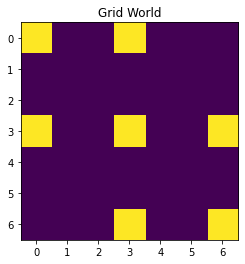

In [ ]:
env = GridEnvironment()
obs = env.reset()
env.render()

In [ ]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
  # This Method will choose steps randomly.
  def step(self, observation):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

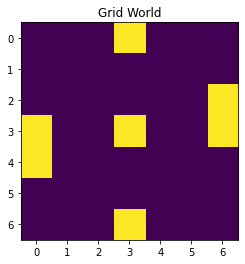

<IPython.core.display.Javascript object>

In [ ]:
env = GridEnvironment()
agent1 = RandomAgent(env)
agent2 = RandomAgent(env)
obs = env.reset()
done1 = False
done2 = False
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()
while not done1 or not done2:
  if not done1:
    action = agent1.step(obs)
    reward, done1, obs = env.step(action, True)
  if not done2:
    action = agent2.step(obs)
    reward, done2, obs = env.step(action, False)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

# DQN

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(49, 64),
    torch.nn.Linear(64, 128),
    torch.nn.Linear(128,4)
)
mse = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [ ]:
class SmartAgent():
    def __init__(self, env, isLearn = True):
      self.env = env
      self.epsilon = 1
      self.action_space = env.action_space
      self.isLearn = isLearn

    def getAction(self, action_space, q_val):
      if np.random.uniform(0,1) < self.epsilon and self.isLearn:
          return np.random.choice(self.action_space.n)
      else:
        return np.argmax(q_val)

In [ ]:
class RunAgent():
  def __init__(self, decay = 0.99, gamma = 0.95):
    self.episode_rewards = []
    self.epsilon_decay = []
    self.decay = decay
    self.gamma = gamma
    self.stepsPerEpi = []
    self.losses = []
    self.expReplay = deque(maxlen=100)
    self.batchSize = 50

  # This Method will make the agent run based on DQN.
  def runAgentDQN(self, env, agent, episode):
    for i in range(episode):
        env.reset()
        done1 =False
        done2 =False
        agent.epsilon = agent.epsilon*self.decay
        obs1Agnt1 = copy.deepcopy(env.state)
        obs1Agnt1[tuple(env.agent_pos2)] = 0
        obs1Agnt1 = torch.from_numpy(obs1Agnt1.flatten()).float()
        obs1Agnt2 = copy.deepcopy(env.state)
        obs1Agnt2[tuple(env.agent_pos1)] = 0
        obs1Agnt2 = torch.from_numpy(obs1Agnt2.flatten()).float()
        while not done1 or not done2:
            # Agent 1
          if not done1:
            q_Val = model(obs1Agnt1)
            action = agent.getAction(env.action_space, q_Val.data.numpy())
            reward1, done1, obs2Agnt1 = env.step(action, True)
            obs2Agnt1[tuple(env.agent_pos2)] = 0
            obs2Agnt1 = torch.from_numpy(obs2Agnt1.flatten()).float()
            self.expReplay.append((obs1Agnt1,action,reward1,obs2Agnt1, 1 if done1 else 0))
            obs1Agnt1 = obs2Agnt1
          #Agent 2
          if not done2:
            q_Val = model(obs1Agnt2)
            action = agent.getAction(env.action_space, q_Val.data.numpy())
            reward2, done2, obs2Agnt2 = env.step(action, False)
            obs2Agnt2[tuple(env.agent_pos1)] = 0
            obs2Agnt2 = torch.from_numpy(obs2Agnt2.flatten()).float()
            self.expReplay.append((obs1Agnt2,action,reward2,obs2Agnt2, 1 if done2 else 0))
            obs1Agnt2 = obs2Agnt2
          if len(self.expReplay) > self.batchSize:                                    
            minibatch = random.sample(self.expReplay, self.batchSize)
            obs1Batch = torch.cat([torch.reshape(o1,(1,49)) for (o1,a,r,o2,d) in minibatch])
            actBatch = torch.Tensor([a for (o1,a,r,o2,d) in minibatch])
            rwrdbatch = torch.Tensor([r for (o1,a,r,o2,d) in minibatch])
            obs2Batch = torch.cat([torch.reshape(o2,(1,49)) for (o1,a,r,o2,d) in minibatch],0)
            isDonebatch = torch.Tensor([d for (o1,a,r,o2,d) in minibatch])
            qVal1 = model(obs1Batch)
            with torch.no_grad():
                qVal2 = model(obs2Batch) 
            y_q = rwrdbatch + (self.gamma*((1-isDonebatch)*torch.max(qVal2,dim=1)[0]))
            X_q = qVal1.gather(dim=1,index=actBatch.long().unsqueeze(dim=1)).squeeze()
            loss = mse(X_q, y_q.detach())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        self.stepsPerEpi.append(env.timestep1 + env.timestep2)
        self.episode_rewards.append(reward1 + reward2)
        self.epsilon_decay.append(agent.epsilon)
    self.ploGraph()

  # This method will run the agent on optimized DQN.
  def runTrainedAgent(self, env, agent, episode):
    episode_rewards = []
    for i in range(episode):
      env.reset()
      agent.isLearn = False
      done1 =False
      done2 =False
      obsAgnt1 = copy.deepcopy(env.state)
      obsAgnt1[tuple(env.agent_pos2)] = 0
      obsAgnt1 = torch.from_numpy(obsAgnt1.flatten()).float()
      obsAgnt2 = copy.deepcopy(env.state)
      obsAgnt2[tuple(env.agent_pos1)] = 0
      obsAgnt2 = torch.from_numpy(obsAgnt2.flatten()).float()
      while not done1 or not done2:
        # Agent 1
        if not done1:
          q_Val = model(obsAgnt1)
          action = agent.getAction(env.action_space, q_Val.data.numpy())
          reward1, done1, obsAgnt1 = env.step(action, True)
          obsAgnt1[tuple(env.agent_pos2)] = 0
          obsAgnt1 = torch.from_numpy(obsAgnt1.flatten()).float()
        #Agent 2
        if not done2:
          q_Val = model(obsAgnt2)
          action = agent.getAction(env.action_space, q_Val.data.numpy())
          reward2, done2, obsAgnt2 = env.step(action, False)
          obsAgnt2[tuple(env.agent_pos1)] = 0
          obsAgnt2 = torch.from_numpy(obsAgnt2.flatten()).float()
      episode_rewards.append(reward1+reward2)
    plt.plot(episode_rewards)
    plt.title("Reward Per Episode")
    plt.xlabel("Number of Episodes")
    plt.ylabel("Reward")
    plt.show
  # This method will plot the graph.
  def ploGraph (self):
    figure, axis = plt.subplots(1,2,figsize=(15,5))
    axis[0].plot(self.episode_rewards)
    axis[0].set_title("Reward Per Episode")
    axis[0].set_xlabel("Number of Episodes")
    axis[0].set_ylabel("Reward")

    axis[1].plot(self.epsilon_decay)
    axis[1].set_title("Epsilon Decay")
    axis[1].set_xlabel("Number of Episodes")
    axis[1].set_ylabel("Epsilon")

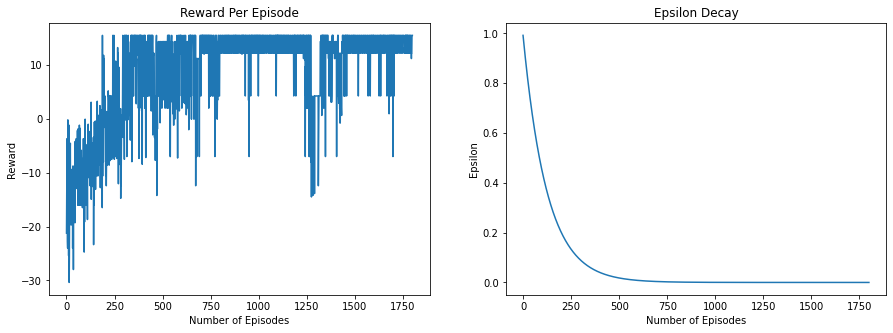

In [ ]:
np.random.seed(10)
env = GridEnvironment()
agent = SmartAgent(env)
runAgent = RunAgent(0.992)
runAgent.runAgentDQN(env, agent ,1800)

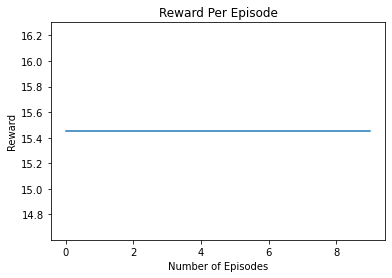

In [ ]:
runAgent.runTrainedAgent(env, agent ,10)

# Double DQN

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(49, 64),
    torch.nn.Linear(64, 128),
    torch.nn.Linear(128,4)
)
mse = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
model_trgt = torch.nn.Sequential(
    torch.nn.Linear(49, 64),
    torch.nn.Linear(64, 128),
    torch.nn.Linear(128,4)
)
mse = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [ ]:
class RunAgenDDQNt():
  def __init__(self, decay = 0.99, gamma = 0.95):
    self.episode_rewards = []
    self.epsilon_decay = []
    self.decay = decay
    self.gamma = gamma
    self.stepsPerEpi = []
    self.losses = []
    self.expReplay = deque(maxlen=100)
    self.batchSize = 50

  # This Method will make the agent run based on DDQN.
  def runAgentDDQN(self, env, agent, episode):
    for i in range(episode):
        env.reset()
        done1 =False
        done2 =False
        agent.epsilon = agent.epsilon*self.decay
        obs1Agnt1 = copy.deepcopy(env.state)
        obs1Agnt1[tuple(env.agent_pos2)] = 0
        obs1Agnt1 = torch.from_numpy(obs1Agnt1.flatten()).float()
        obs1Agnt2 = copy.deepcopy(env.state)
        obs1Agnt2[tuple(env.agent_pos1)] = 0
        obs1Agnt2 = torch.from_numpy(obs1Agnt2.flatten()).float()
        while not done1 or not done2:
          # Agent 1
          if not done1:
            q_Val = model(obs1Agnt1)
            action = agent.getAction(env.action_space, q_Val.data.numpy())
            reward1, done1, obs2Agnt1 = env.step(action, True)
            obs2Agnt1[tuple(env.agent_pos2)] = 0
            obs2Agnt1 = torch.from_numpy(obs2Agnt1.flatten()).float()
            self.expReplay.append((obs1Agnt1,action,reward1,obs2Agnt1, 1 if done1 else 0))
            obs1Agnt1 = obs2Agnt1
          # Agent 2
          if not done2:
            q_Val = model(obs1Agnt2)
            action = agent.getAction(env.action_space, q_Val.data.numpy())
            reward2, done2, obs2Agnt2 = env.step(action, False)
            obs2Agnt2[tuple(env.agent_pos1)] = 0
            obs2Agnt2 = torch.from_numpy(obs2Agnt2.flatten()).float()
            self.expReplay.append((obs1Agnt2,action,reward2,obs2Agnt2, 1 if done2 else 0))
            obs1Agnt2 = obs2Agnt2
          if len(self.expReplay) > self.batchSize:                                    
            minibatch = random.sample(self.expReplay, self.batchSize)
            obs1Batch = torch.cat([torch.reshape(o1,(1,49)) for (o1,a,r,o2,d) in minibatch])
            actBatch = torch.Tensor([a for (o1,a,r,o2,d) in minibatch])
            rwrdbatch = torch.Tensor([r for (o1,a,r,o2,d) in minibatch])
            obs2Batch = torch.cat([torch.reshape(o2,(1,49)) for (o1,a,r,o2,d) in minibatch],0)
            isDonebatch = torch.Tensor([d for (o1,a,r,o2,d) in minibatch])
            qVal1 = model(obs1Batch)
            qVal2 = model(obs2Batch) 
            maxAction = np.argmax(qVal2.data.numpy(), axis=1)
            qVal2Trgt = (model_trgt(obs2Batch)).data.numpy()
            y_q = rwrdbatch + (self.gamma*((1-isDonebatch)*torch.from_numpy(qVal2Trgt[np.arange(len(qVal2Trgt)), maxAction])))
            X_q = qVal1.gather(dim=1,index=actBatch.long().unsqueeze(dim=1)).squeeze()
            loss = mse(X_q, y_q.detach())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        self.stepsPerEpi.append(env.timestep1 + env.timestep2)
        self.episode_rewards.append(reward1 + reward2)
        self.epsilon_decay.append(agent.epsilon)
        model_trgt = copy.deepcopy(model)
    self.ploGraph()

  # This method will run the agent on optimized DQN.
  def runTrainedAgent(self, env, agent, episode):
    episode_rewards = []
    for i in range(episode):
      env.reset()
      agent.isLearn = False
      done1 =False
      done2 =False
      obsAgnt1 = copy.deepcopy(env.state)
      obsAgnt1[tuple(env.agent_pos2)] = 0
      obsAgnt1 = torch.from_numpy(obsAgnt1.flatten()).float()
      obsAgnt2 = copy.deepcopy(env.state)
      obsAgnt2[tuple(env.agent_pos1)] = 0
      obsAgnt2 = torch.from_numpy(obsAgnt2.flatten()).float()
      while not done1 or not done2:
        # Agent 1
        if not done1:
          q_Val = model(obsAgnt1)
          action = agent.getAction(env.action_space, q_Val.data.numpy())
          reward1, done1, obsAgnt1 = env.step(action, True)
          obsAgnt1[tuple(env.agent_pos2)] = 0
          obsAgnt1 = torch.from_numpy(obsAgnt1.flatten()).float()
        #Agent 2
        if not done2:
          q_Val = model(obsAgnt2)
          action = agent.getAction(env.action_space, q_Val.data.numpy())
          reward2, done2, obsAgnt2 = env.step(action, False)
          obsAgnt2[tuple(env.agent_pos1)] = 0
          obsAgnt2 = torch.from_numpy(obsAgnt2.flatten()).float()
      episode_rewards.append(reward1+reward2)
    plt.plot(episode_rewards)
    plt.title("Reward Per Episode")
    plt.xlabel("Number of Episodes")
    plt.ylabel("Reward")
    plt.show
  # This method will plot the graph.
  def ploGraph (self):
    figure, axis = plt.subplots(1,2,figsize=(15,5))
    axis[0].plot(self.episode_rewards)
    axis[0].set_title("Reward Per Episode")
    axis[0].set_xlabel("Number of Episodes")
    axis[0].set_ylabel("Reward")

    axis[1].plot(self.epsilon_decay)
    axis[1].set_title("Epsilon Decay")
    axis[1].set_xlabel("Number of Episodes")
    axis[1].set_ylabel("Epsilon")

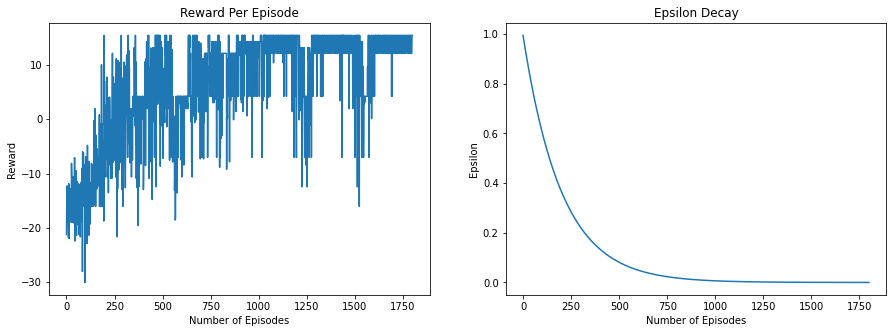

In [ ]:
np.random.seed(10)
env = GridEnvironment()
agent = SmartAgent(env)
runAgent = RunAgenDDQNt(0.995)
runAgent.runAgentDDQN(env, agent ,1800)

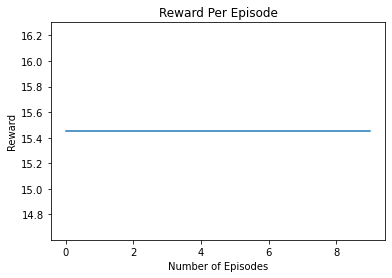

In [ ]:
runAgent.runTrainedAgent(env, agent ,10)